In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('weather.csv')

In [79]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [80]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [81]:
obj_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(include=['int64', 'float64'])

In [82]:
obj_df

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,NW,SW,NW,No,Yes
1,ENE,E,W,Yes,Yes
2,NW,N,NNE,Yes,Yes
3,NW,WNW,W,Yes,Yes
4,SSE,SSE,ESE,Yes,No
...,...,...,...,...,...
361,NNW,SSE,NW,No,No
362,N,NNW,NNW,No,No
363,ESE,ENE,ENE,No,No
364,NW,SSW,WNW,No,No


In [83]:
num_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0.0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0.0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0.0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0.0


In [84]:
obj_df = obj_df.fillna(obj_df.mode().iloc[0])
obj_df

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,NW,SW,NW,No,Yes
1,ENE,E,W,Yes,Yes
2,NW,N,NNE,Yes,Yes
3,NW,WNW,W,Yes,Yes
4,SSE,SSE,ESE,Yes,No
...,...,...,...,...,...
361,NNW,SSE,NW,No,No
362,N,NNW,NNW,No,No
363,ESE,ENE,ENE,No,No
364,NW,SSW,WNW,No,No


In [85]:
obj_df.isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [86]:
num_df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustSpeed    2
WindSpeed9am     7
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [87]:
# Label Encoding
le = LabelEncoder()
obj_df_label = obj_df.copy()
obj_df_label = obj_df.apply(le.fit_transform)

In [88]:
obj_df_label

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,7,12,7,0,1
1,1,0,13,1,1
2,7,3,5,1,1
3,7,14,13,1,1
4,10,10,2,1,0
...,...,...,...,...,...
361,6,10,7,0,0
362,3,6,6,0,0
363,2,1,1,0,0
364,7,11,14,0,0


In [89]:
obj_df_onehot = obj_df.copy()

In [90]:
obj_df_onehot

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,NW,SW,NW,No,Yes
1,ENE,E,W,Yes,Yes
2,NW,N,NNE,Yes,Yes
3,NW,WNW,W,Yes,Yes
4,SSE,SSE,ESE,Yes,No
...,...,...,...,...,...
361,NNW,SSE,NW,No,No
362,N,NNW,NNW,No,No
363,ESE,ENE,ENE,No,No
364,NW,SSW,WNW,No,No


In [91]:
obj_df_onehot.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [92]:
obj_df_onehot = pd.get_dummies(obj_df_onehot, columns=obj_df_onehot.columns)

In [93]:
obj_df

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,NW,SW,NW,No,Yes
1,ENE,E,W,Yes,Yes
2,NW,N,NNE,Yes,Yes
3,NW,WNW,W,Yes,Yes
4,SSE,SSE,ESE,Yes,No
...,...,...,...,...,...
361,NNW,SSE,NW,No,No
362,N,NNW,NNW,No,No
363,ESE,ENE,ENE,No,No
364,NW,SSW,WNW,No,No


In [94]:
obj_df_onehot

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
362,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
363,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
364,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False


In [95]:
obj_df_binarizer = obj_df.copy()

In [96]:
obj_df_binarizer.isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [97]:
obj_df_binarizer

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,NW,SW,NW,No,Yes
1,ENE,E,W,Yes,Yes
2,NW,N,NNE,Yes,Yes
3,NW,WNW,W,Yes,Yes
4,SSE,SSE,ESE,Yes,No
...,...,...,...,...,...
361,NNW,SSE,NW,No,No
362,N,NNW,NNW,No,No
363,ESE,ENE,ENE,No,No
364,NW,SSW,WNW,No,No


In [98]:
obj_df_binarizer.shape

(366, 5)

In [99]:
# #label binarizer
# lb = LabelBinarizer()
# obj_df_binarizer = obj_df_binarizer.apply(lb.fit_transform)

In [100]:
num_df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustSpeed    2
WindSpeed9am     7
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [101]:
num_df_mean = num_df.copy()

In [102]:
num_df_mean = num_df_mean.fillna(num_df_mean.mean())

In [103]:
num_df_mean.shape

(366, 17)

In [104]:
# #removing outliers
# num_df_mean = num_df_mean[(num_df_mean.T != 0).any()]

# num_df_mean

In [105]:
# Q1 = num_df_mean.quantile(0.25)
# Q3 = num_df_mean.quantile(0.75)

# IQR = Q3 - Q1

# num_df_mean = num_df_mean[~((num_df_mean < (Q1 - 1.5 * IQR)) |(num_df_mean > (Q3 + 1.5 * IQR))).any(axis=1)]

In [106]:
num_df_mean

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0.0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0.0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0.0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0.0


In [107]:
#merging the dataframes
df_new = pd.concat([num_df_mean, obj_df_label], axis=1)

In [108]:
df_new

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,...,7,7,14.4,23.6,3.6,7,12,7,0,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,...,5,3,17.5,25.7,3.6,1,0,13,1,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,...,8,7,15.4,20.2,39.8,7,3,5,1,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,...,2,7,13.5,14.1,2.8,7,14,13,1,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,...,7,7,11.1,15.4,0.0,10,10,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,...,1,3,20.4,30.0,0.0,6,10,7,0,0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,...,0,1,17.2,28.2,0.0,3,6,6,0,0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,...,3,2,14.5,18.3,0.0,2,1,1,0,0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,...,6,7,15.8,25.9,0.0,7,11,14,0,0


In [109]:
df_new.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

In [110]:
obj_df_label

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,7,12,7,0,1
1,1,0,13,1,1
2,7,3,5,1,1
3,7,14,13,1,1
4,10,10,2,1,0
...,...,...,...,...,...
361,6,10,7,0,0
362,3,6,6,0,0
363,2,1,1,0,0
364,7,11,14,0,0


In [111]:
df_new

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,...,7,7,14.4,23.6,3.6,7,12,7,0,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,...,5,3,17.5,25.7,3.6,1,0,13,1,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,...,8,7,15.4,20.2,39.8,7,3,5,1,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,...,2,7,13.5,14.1,2.8,7,14,13,1,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,...,7,7,11.1,15.4,0.0,10,10,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,...,1,3,20.4,30.0,0.0,6,10,7,0,0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,...,0,1,17.2,28.2,0.0,3,6,6,0,0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,...,3,2,14.5,18.3,0.0,2,1,1,0,0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,...,6,7,15.8,25.9,0.0,7,11,14,0,0


In [112]:
import seaborn as sns

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


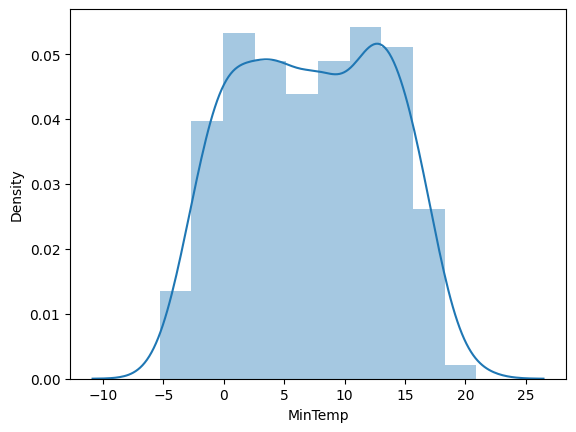

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


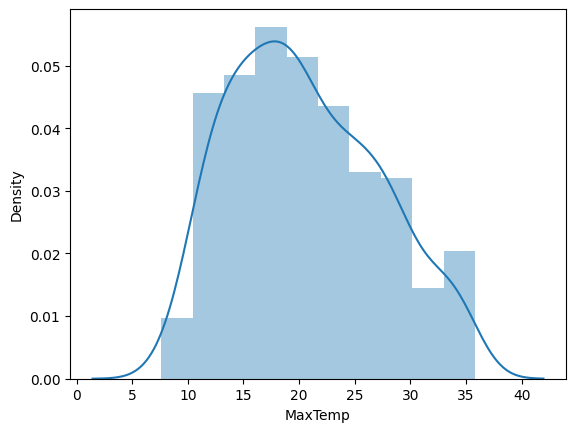

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


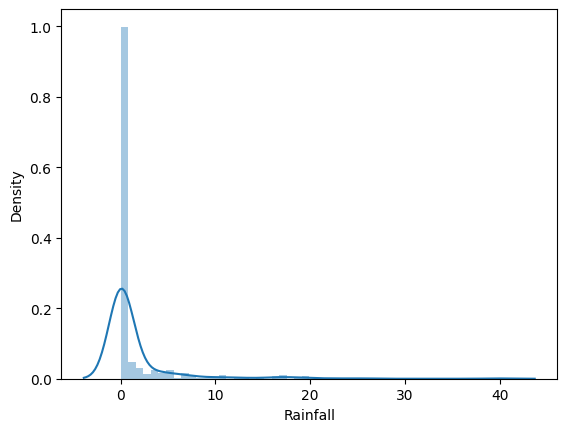

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


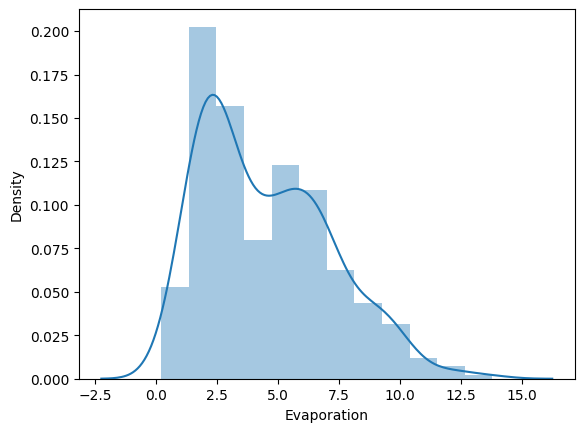

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


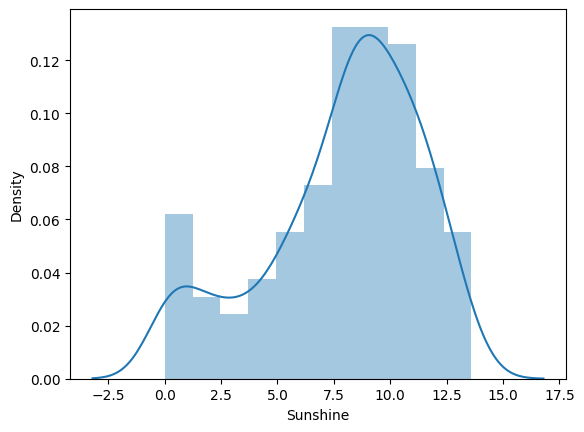

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


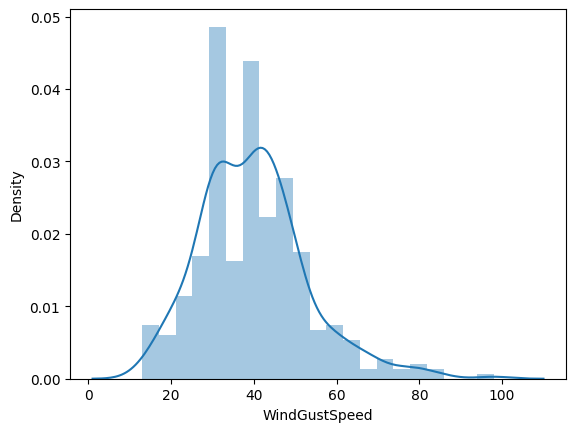

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


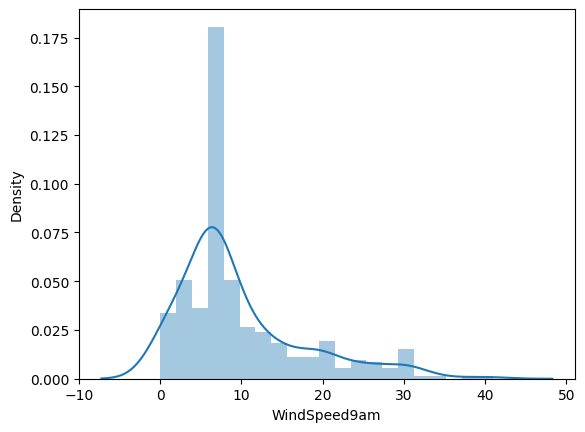

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


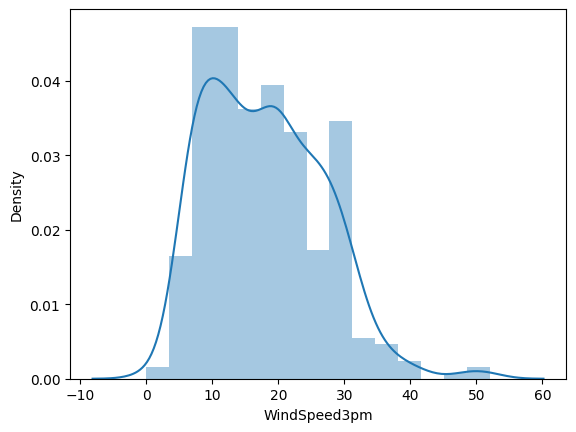

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


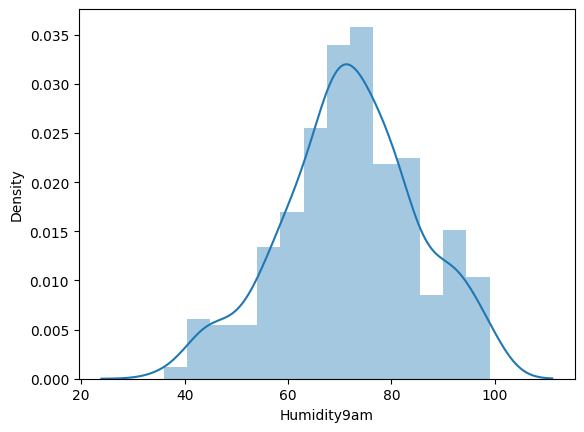

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


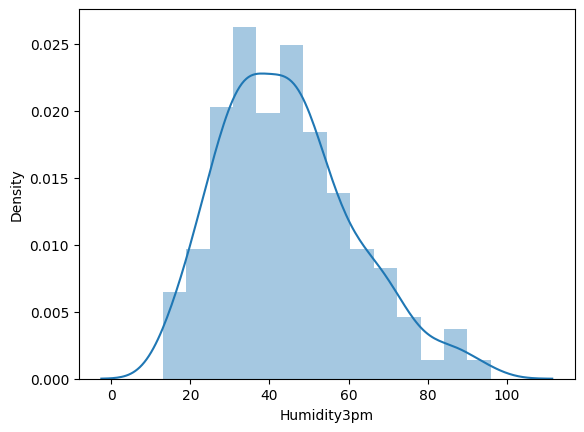

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


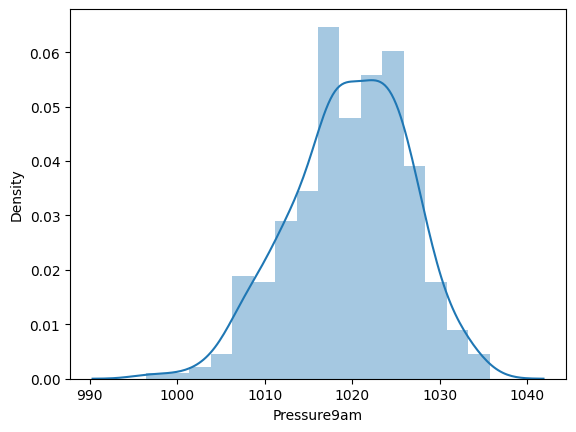

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


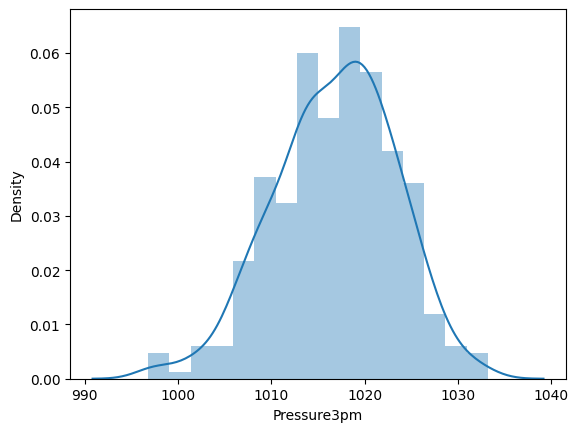

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


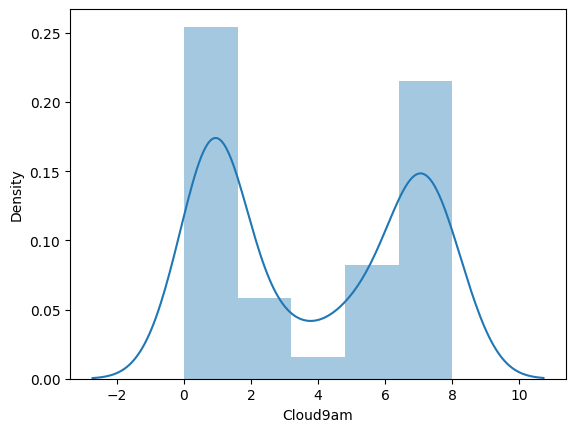

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


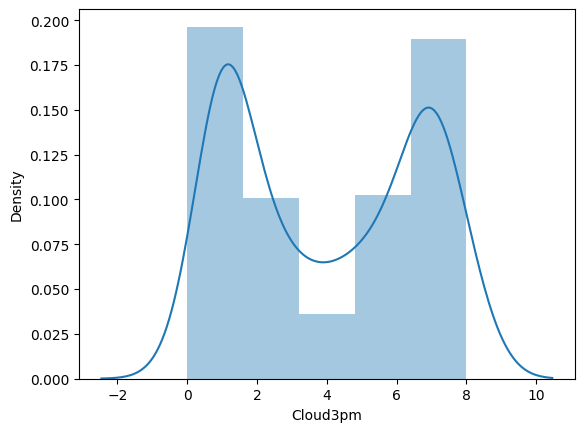

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


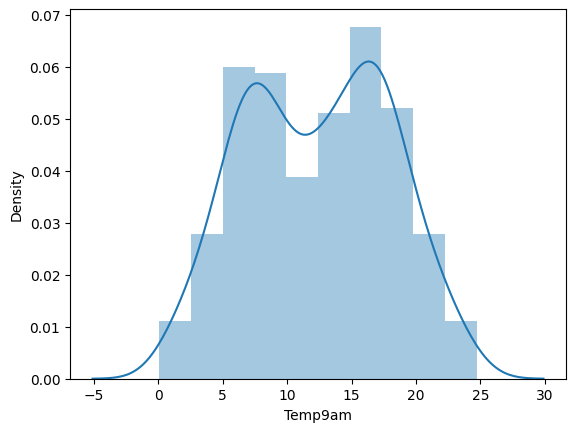

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


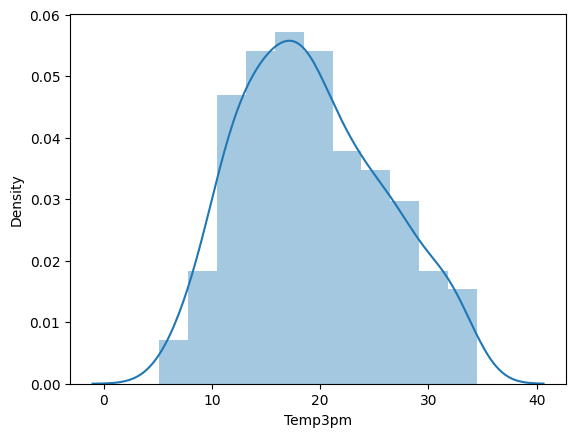

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


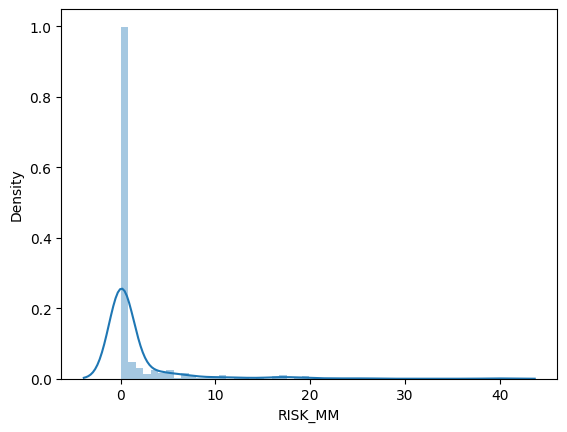

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


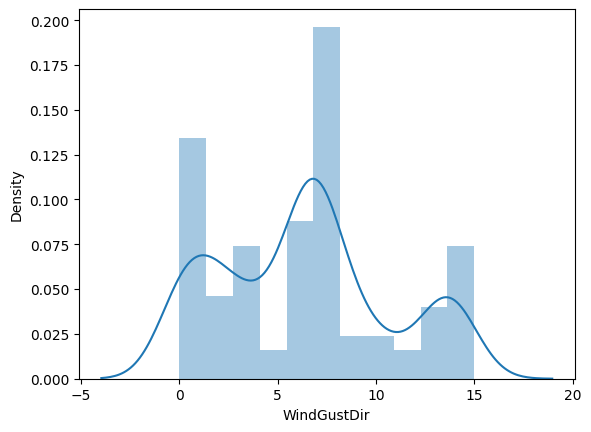

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


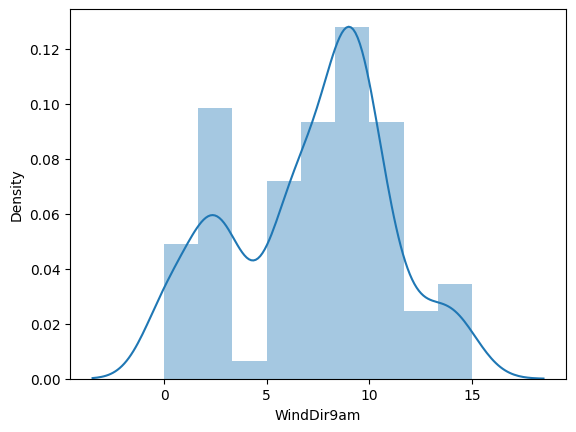

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


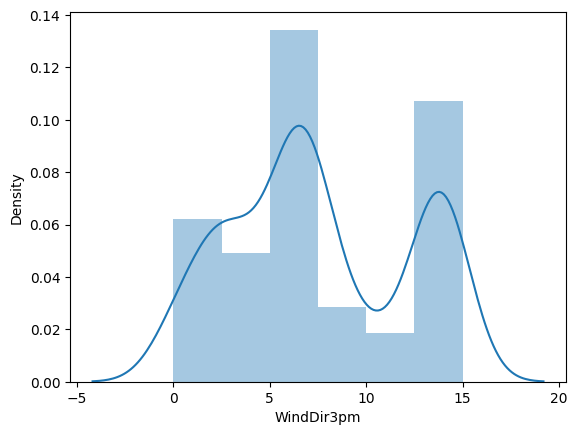

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


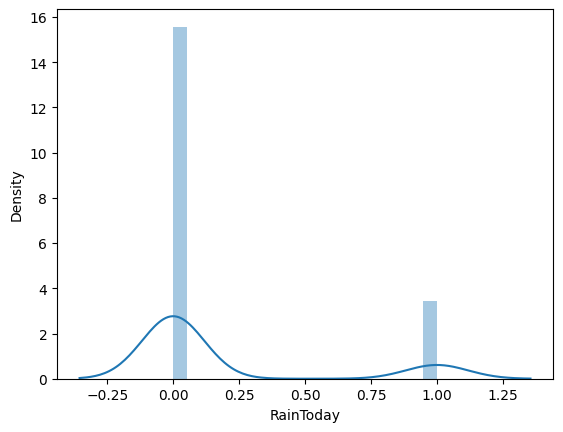

/tmp/ipykernel_5955/2605093173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i])


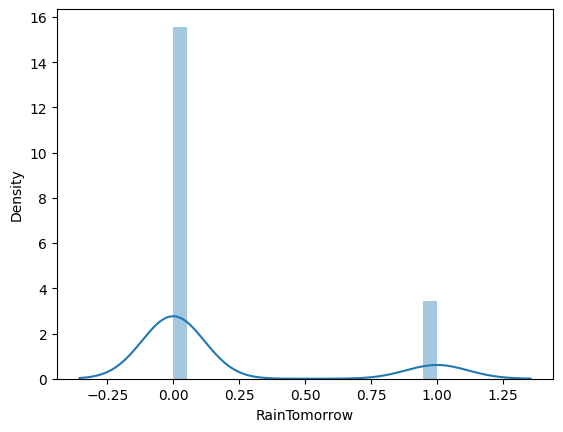

In [113]:
#distplot for each column
for i in df_new.columns:
    sns.distplot(df_new[i])
    plt.show()

In [114]:
df_new_log = df_new.copy()

In [115]:
df_new_sqrt = df_new.copy()
np.sqrt(df_new_sqrt)

/home/feather/Documents/ML/venv/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2.828427,4.929503,0.000000,1.843909,2.509980,5.477226,2.449490,4.472136,8.246211,5.385165,...,2.645751,2.645751,3.794733,4.857983,1.897367,2.645751,3.464102,2.645751,0.0,1.0
1,3.741657,5.186521,1.897367,2.097618,3.114482,6.244998,2.000000,4.123106,8.944272,6.000000,...,2.236068,1.732051,4.183300,5.069517,1.897367,1.000000,0.000000,3.605551,1.0,1.0
2,3.701351,4.837355,1.897367,2.408319,1.816590,9.219544,2.449490,2.449490,9.055385,8.306624,...,2.828427,2.645751,3.924283,4.494441,6.308724,2.645751,1.732051,2.236068,1.0,1.0
3,3.646917,3.937004,6.308724,2.683282,3.016621,7.348469,5.477226,4.898979,7.874008,7.483315,...,1.414214,2.645751,3.674235,3.754997,1.673320,2.645751,3.741657,3.605551,1.0,1.0
4,2.756810,4.012481,1.673320,2.366432,3.255764,7.071068,4.472136,5.291503,8.246211,7.000000,...,2.645751,2.645751,3.331666,3.924283,0.000000,3.162278,3.162278,1.414214,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,3.000000,5.540758,0.000000,2.756810,3.478505,8.717798,2.645751,7.071068,6.164414,3.872983,...,1.000000,1.732051,4.516636,5.477226,0.000000,2.449490,3.162278,2.645751,0.0,0.0
362,2.664583,5.329165,0.000000,3.405877,3.563706,6.928203,1.414214,4.358899,6.708204,4.690416,...,0.000000,1.000000,4.147288,5.310367,0.000000,1.732051,2.449490,2.449490,0.0,0.0
363,3.535534,4.460942,0.000000,2.898275,2.302173,6.557439,3.316625,3.000000,7.937254,6.855655,...,1.732051,1.414214,3.807887,4.277850,0.000000,1.414214,1.000000,1.000000,0.0,0.0
364,3.535534,5.186521,0.000000,2.236068,2.664583,6.782330,2.449490,5.291503,8.306624,6.244998,...,2.449490,2.645751,3.974921,5.089204,0.000000,2.645751,3.316625,3.741657,0.0,0.0


/tmp/ipykernel_5955/275984994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_sqrt)


<Axes: ylabel='Density'>

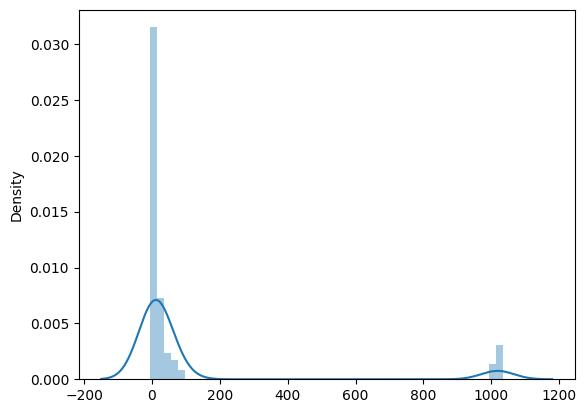

In [116]:
sns.distplot(df_new_sqrt)

In [117]:
#log transformation
np.seterr(divide = 'ignore')
df_new_log = np.log(df_new)
df_new_log = df_new_log.replace([np.inf, -np.inf], np.nan)

/home/feather/Documents/ML/venv/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


/tmp/ipykernel_5955/4199572141.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_log)


<Axes: ylabel='Density'>

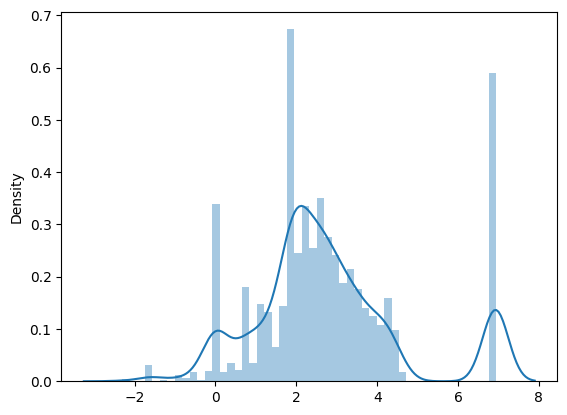

In [118]:
sns.distplot(df_new_log)

In [119]:
#reciprocal transformation
df_new_reciprocal = df_new.copy()
df_new_reciprocal = 1/df_new_reciprocal
df_new_reciprocal = df_new_reciprocal.replace([np.inf, -np.inf], np.nan)

In [120]:
df_new_reciprocal.isnull().sum()

MinTemp            1
MaxTemp            0
Rainfall         263
Evaporation        0
Sunshine          10
WindGustSpeed      0
WindSpeed9am      24
WindSpeed3pm       1
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am          33
Cloud3pm           6
Temp9am            0
Temp3pm            0
RISK_MM          263
WindGustDir       37
WindDir9am        22
WindDir3pm        17
RainToday        300
RainTomorrow     300
dtype: int64

/tmp/ipykernel_5955/2210332190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_reciprocal)


<Axes: ylabel='Density'>

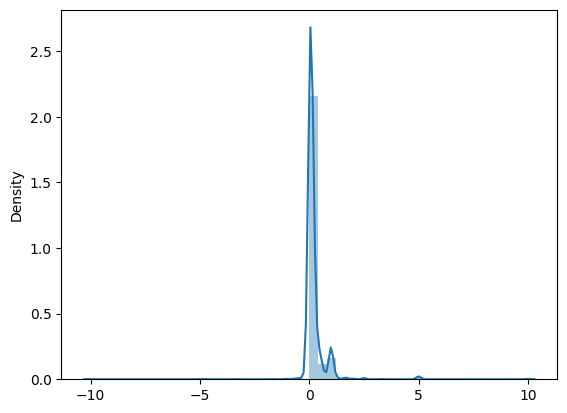

In [121]:
sns.distplot(df_new_reciprocal)

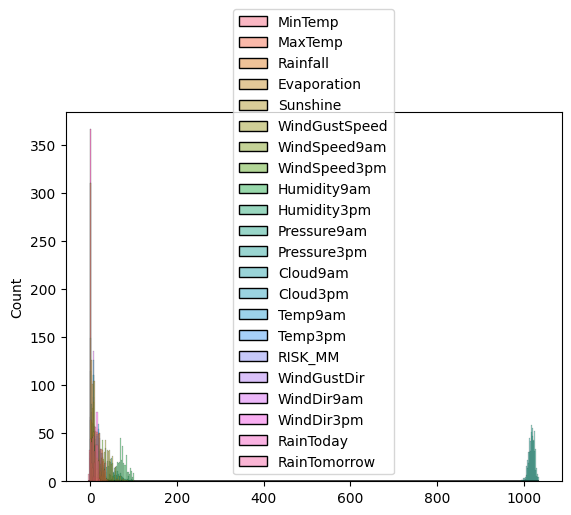

In [122]:
sns.histplot(df_new)
plt.show()

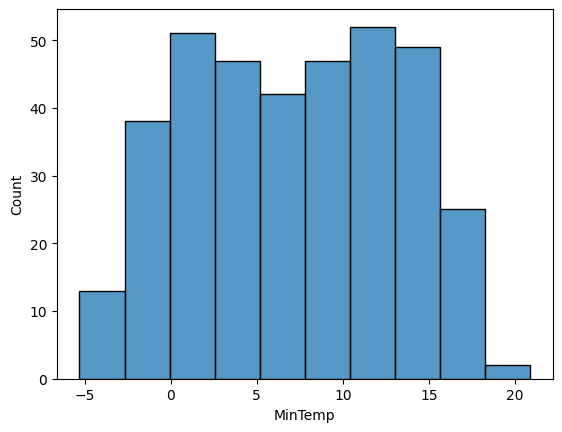

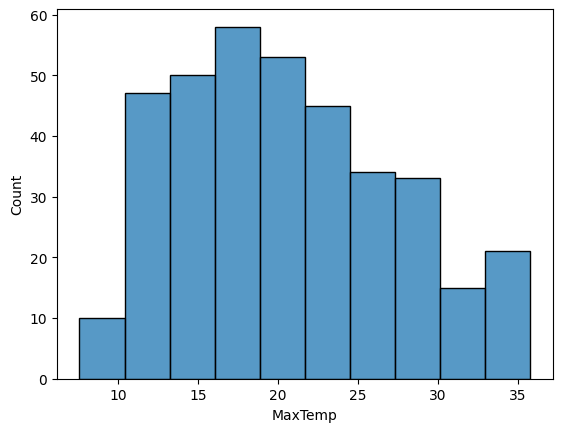

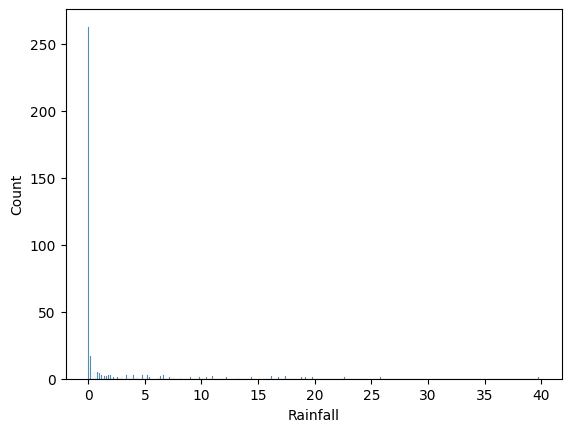

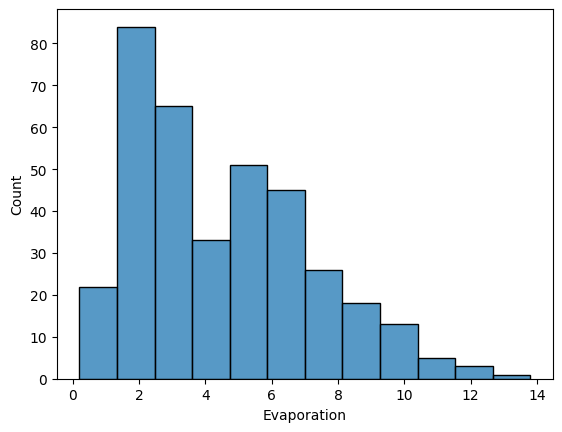

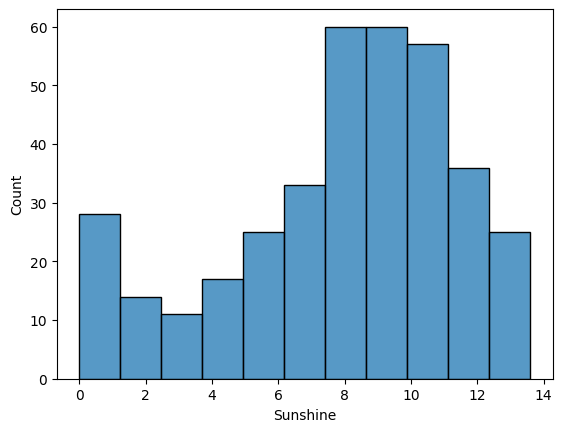

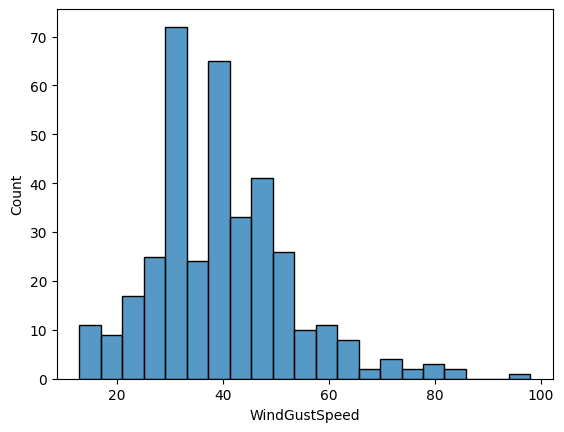

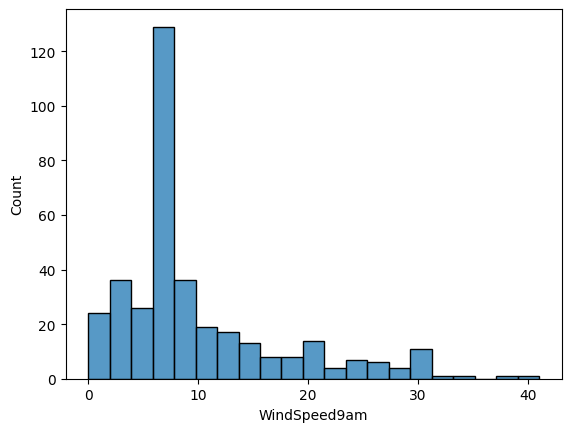

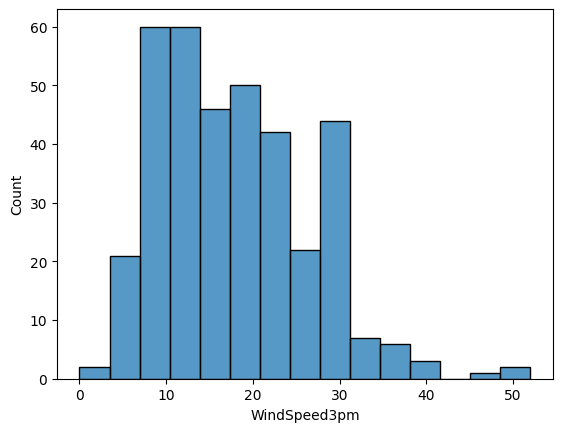

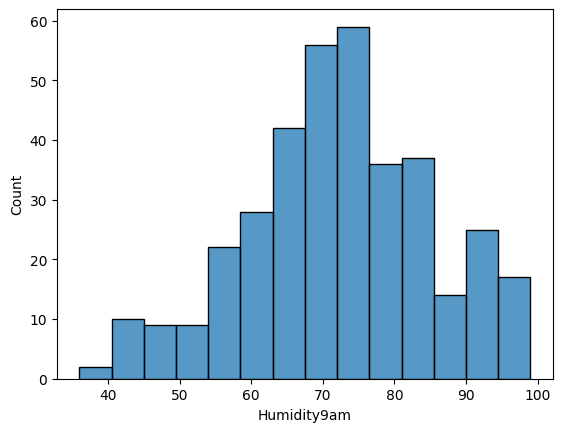

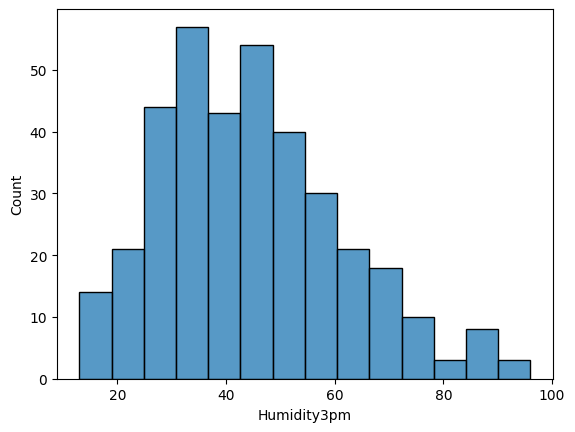

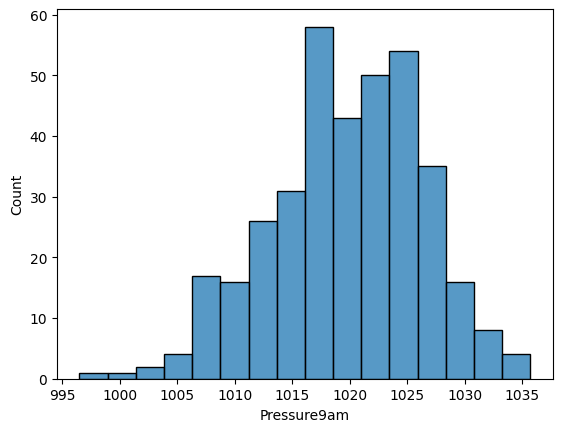

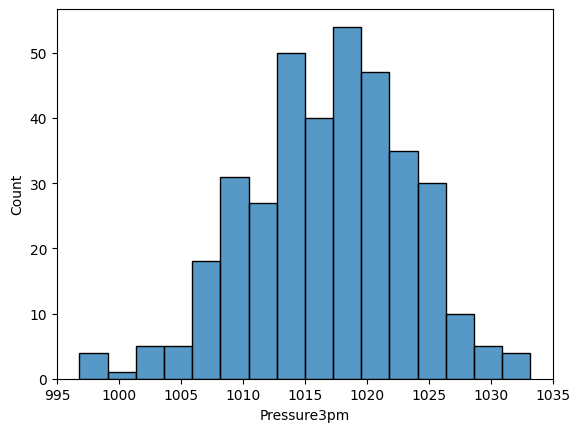

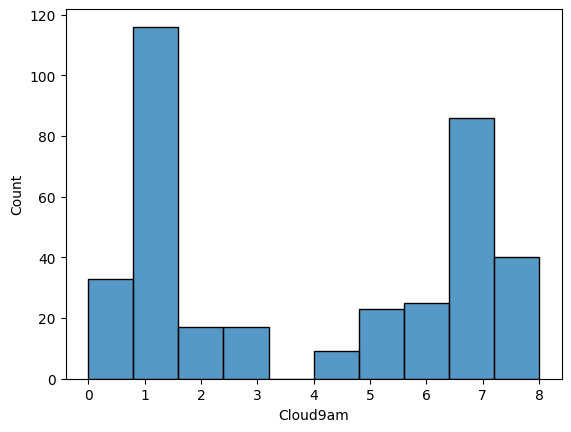

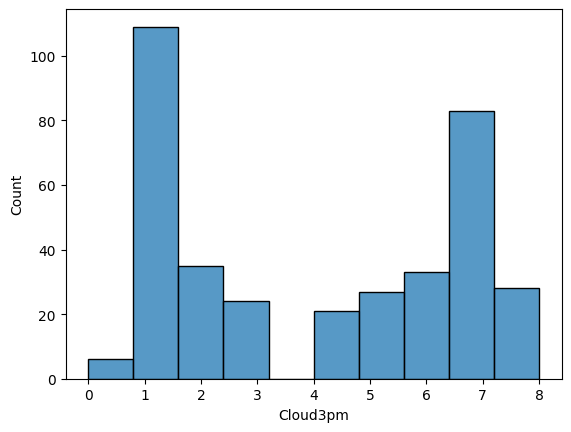

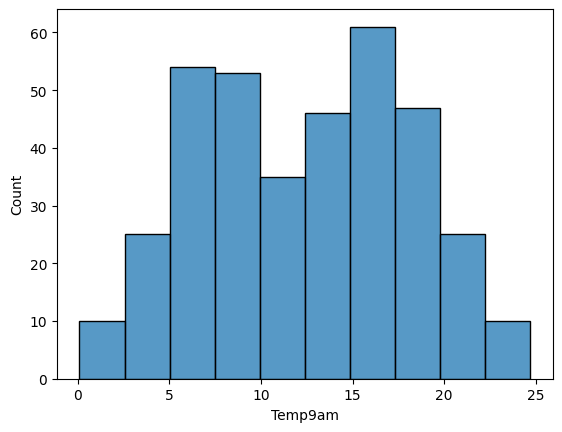

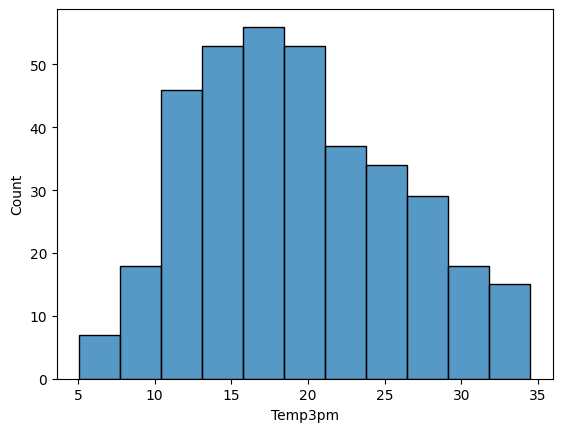

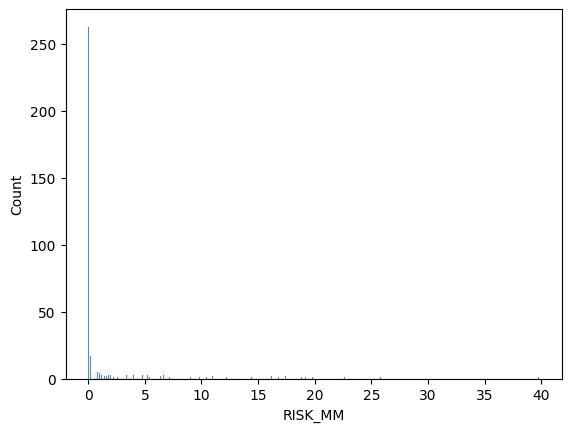

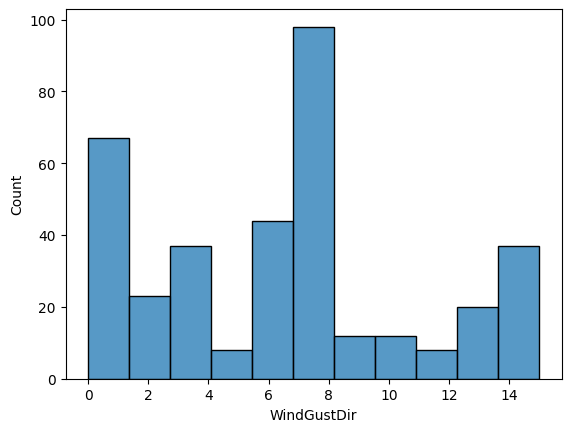

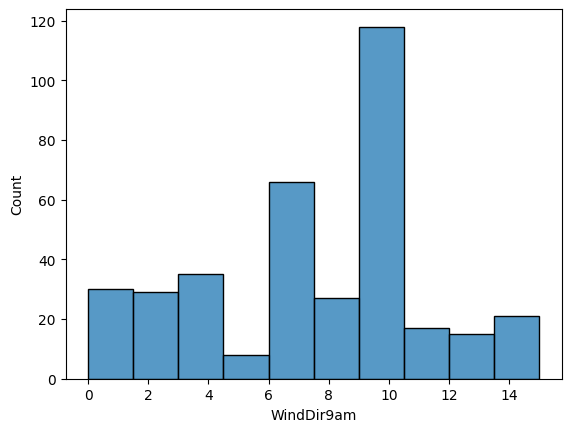

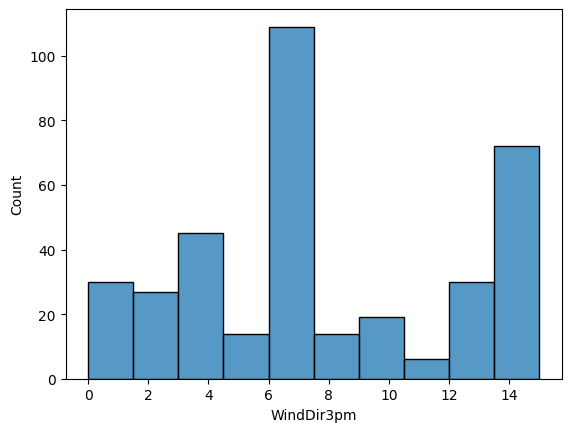

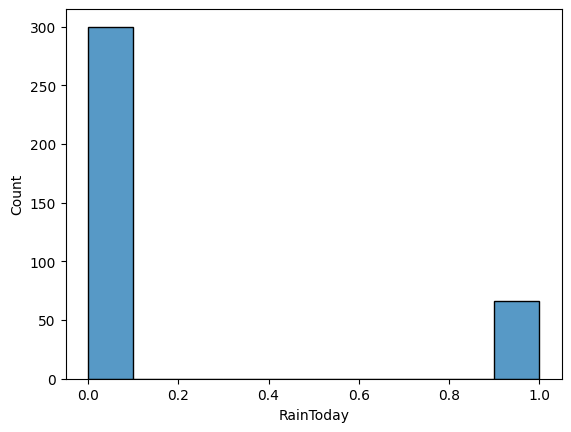

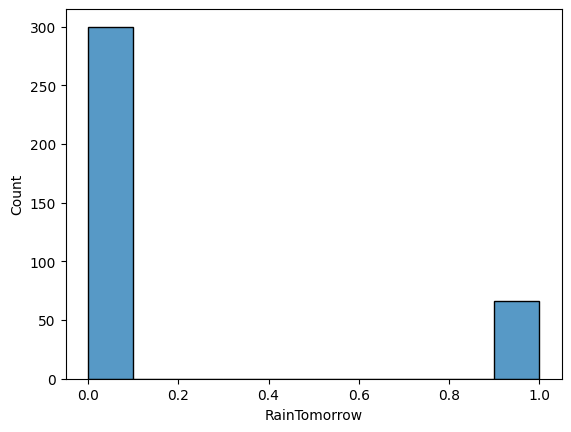

In [123]:
#histplot per column
#plt side by side
for i in df_new.columns:
    sns.histplot(df_new[i])
    plt.show()

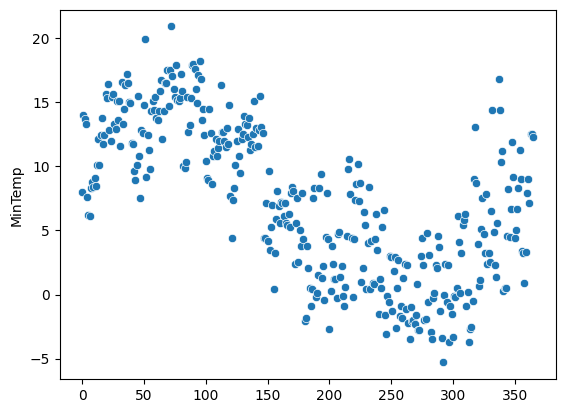

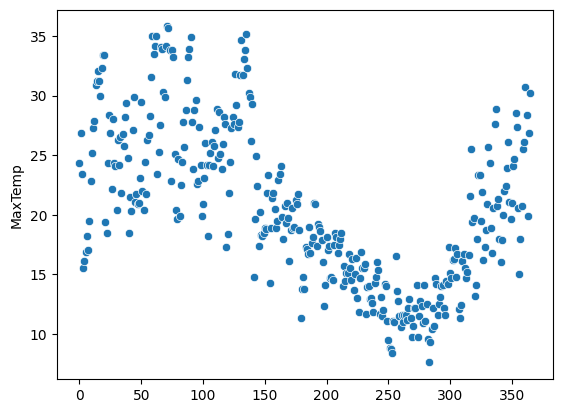

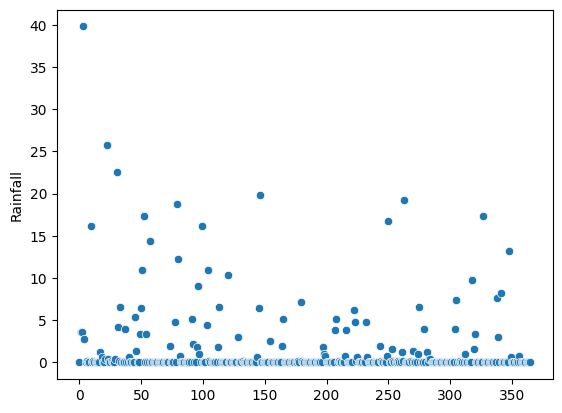

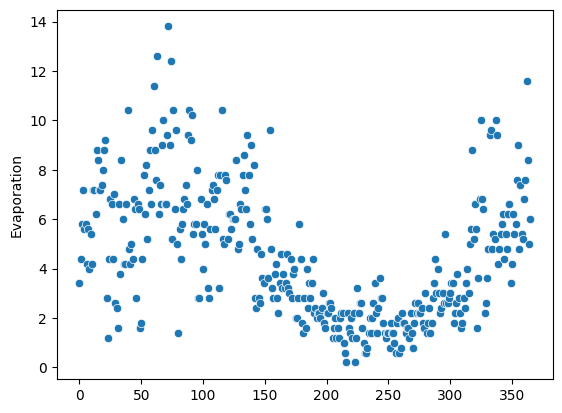

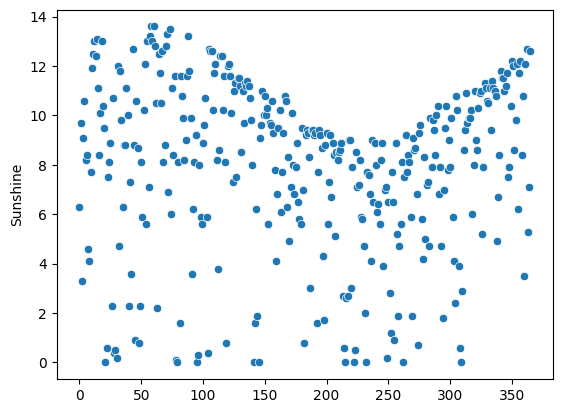

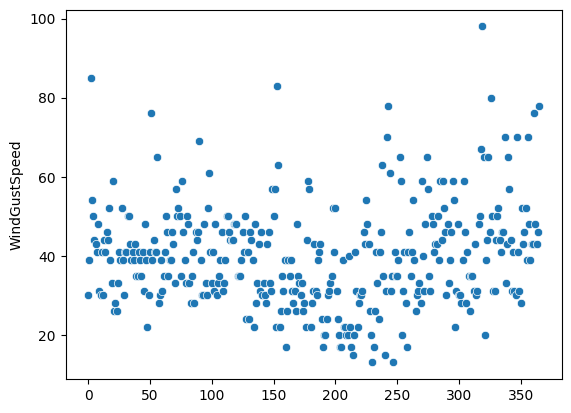

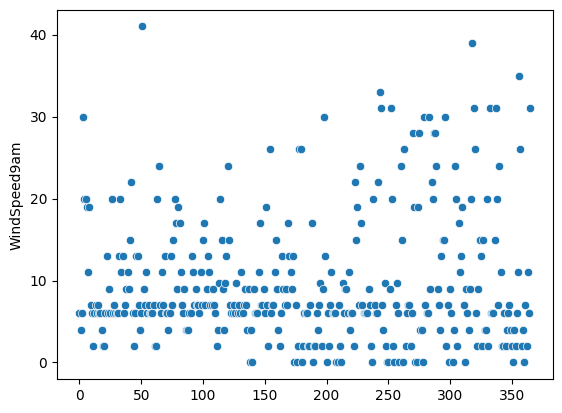

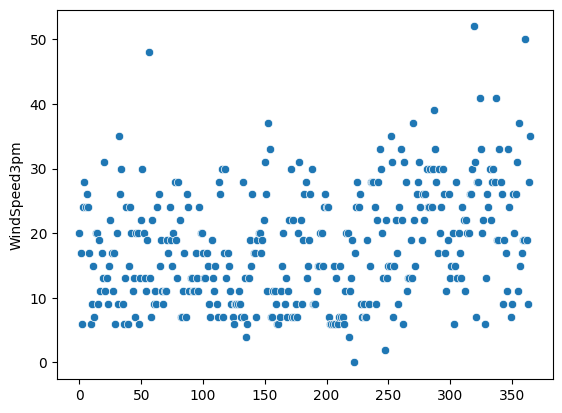

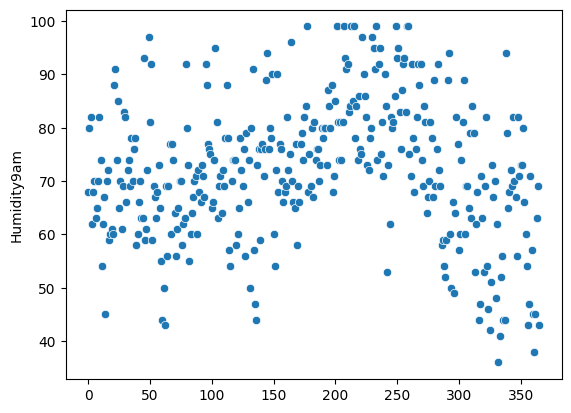

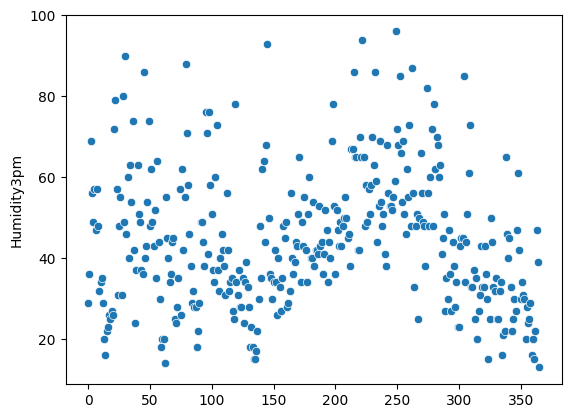

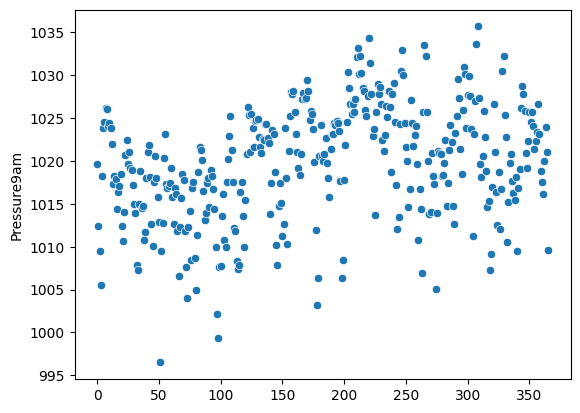

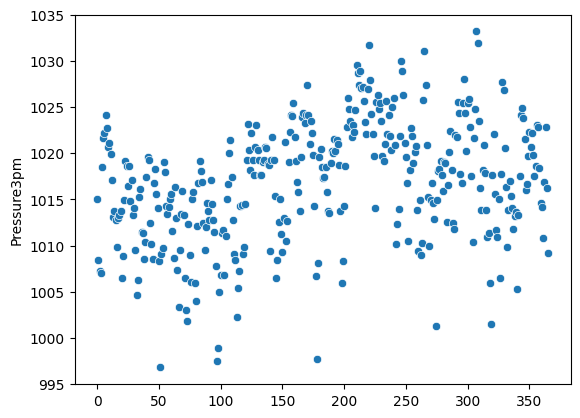

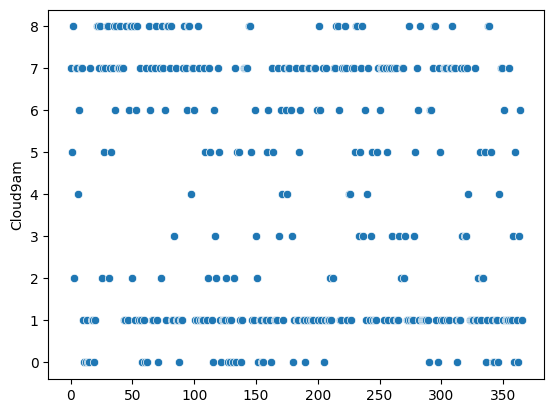

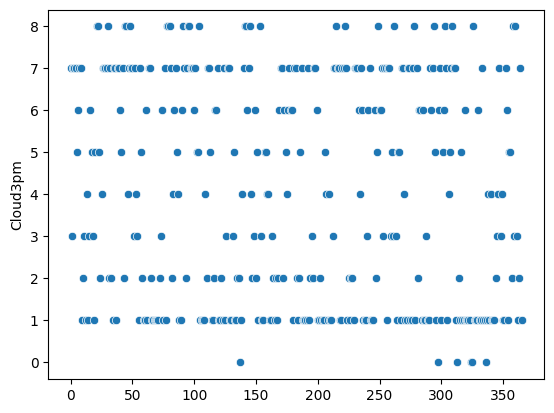

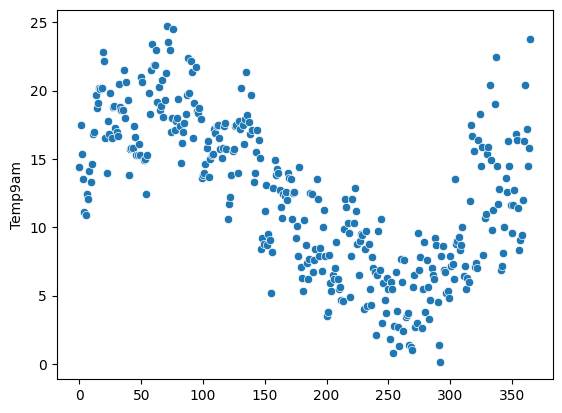

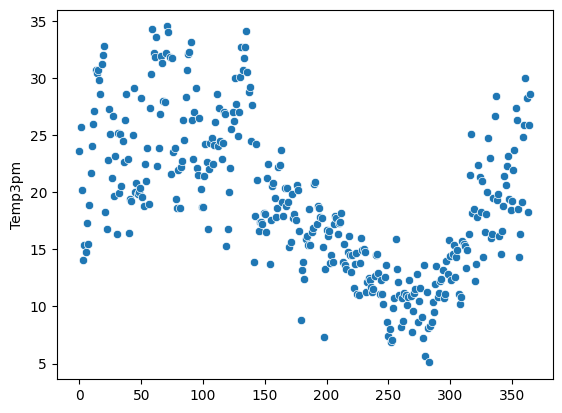

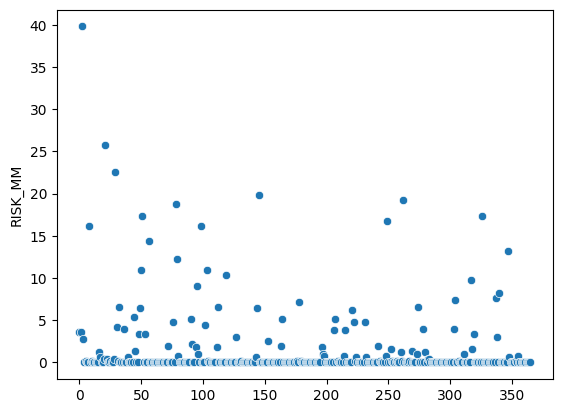

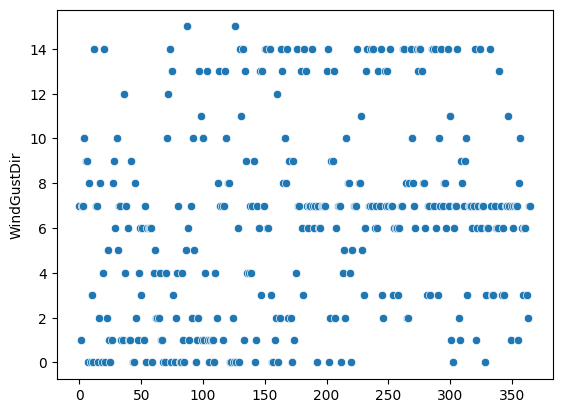

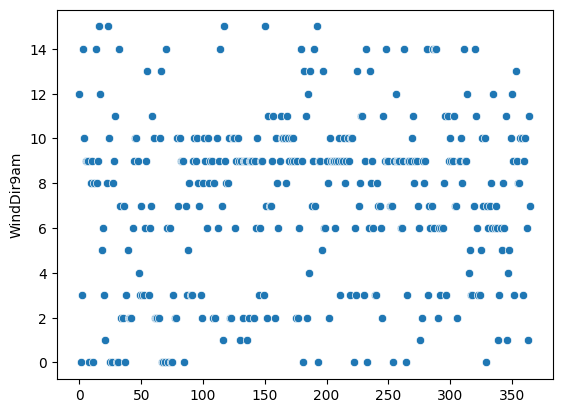

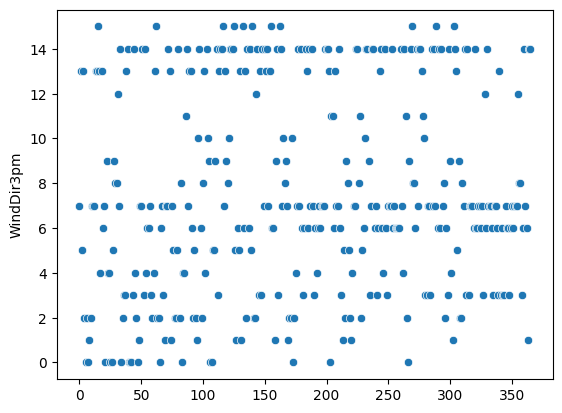

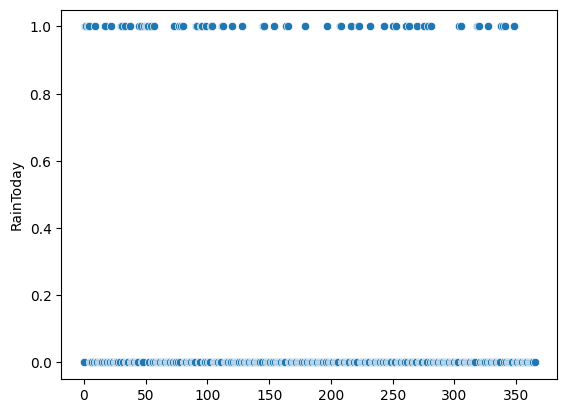

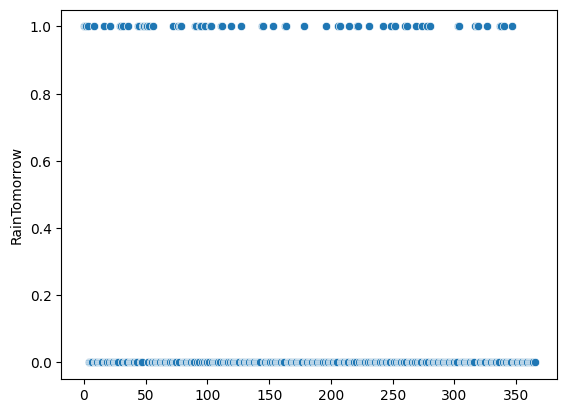

In [124]:
#scatterplot per column
for i in df_new.columns:
    sns.scatterplot(df_new[i])
    plt.show()

<Axes: >

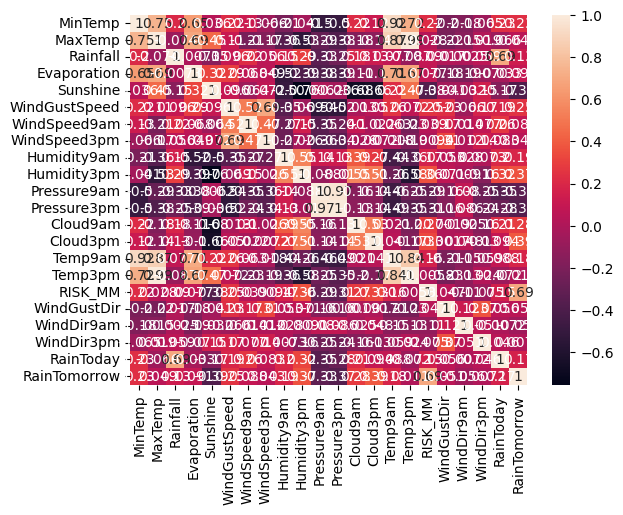

In [125]:
#heatmap
sns.heatmap(df_new.corr(), annot=True)

In [126]:
#pairplot
# sns.pairplot(df_new)

In [127]:
# sns.scatterplot(df_new_log)

In [128]:
# sns.histplot(df_new_log)

In [129]:
# # for i in df_new_log.columns:
#     sns.histplot(df_new_log[i], bins=20)
#     plt.show()

In [130]:
# for i in df_new_log.columns:
#     sns.distplot(df_new_log[i])
#     plt.show()

In [131]:
# sns.pairplot(df_new_log)

In [132]:
#     #split pairplot in parts
# sns.pairplot(df_new_log.iloc[:,0:11])

In [133]:
df_new_log.shape

(366, 22)

In [134]:
df_new_log.isnull().sum()

MinTemp           52
MaxTemp            0
Rainfall         263
Evaporation        0
Sunshine          10
WindGustSpeed      0
WindSpeed9am      24
WindSpeed3pm       1
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am          33
Cloud3pm           6
Temp9am            0
Temp3pm            0
RISK_MM          263
WindGustDir       37
WindDir9am        22
WindDir3pm        17
RainToday        300
RainTomorrow     300
dtype: int64

In [135]:
processed_df = df_new_log.copy()
processed_df.isnull().sum()

MinTemp           52
MaxTemp            0
Rainfall         263
Evaporation        0
Sunshine          10
WindGustSpeed      0
WindSpeed9am      24
WindSpeed3pm       1
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am          33
Cloud3pm           6
Temp9am            0
Temp3pm            0
RISK_MM          263
WindGustDir       37
WindDir9am        22
WindDir3pm        17
RainToday        300
RainTomorrow     300
dtype: int64

In [136]:
processed_df_mean = processed_df.fillna(processed_df.mean())
processed_df_mean.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

In [137]:
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2

In [138]:
W = processed_df_mean.iloc[:,:-1]
V = processed_df_mean.iloc[:,-1]

In [139]:
print("Data :\n", W, "\n")

Data :
       MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0    2.079442  3.190476  0.717196     1.223775  1.840550       3.401197   
1    2.639057  3.292126  1.280934     1.481605  2.272126       3.663562   
2    2.617396  3.152736  1.280934     1.757858  1.193922       4.442651   
3    2.587764  2.740840  3.683867     1.974081  2.208274       3.988984   
4    2.028148  2.778819  1.029619     1.722767  2.360854       3.912023   
..        ...       ...       ...          ...       ...            ...   
361  2.197225  3.424263  0.717196     2.028148  2.493205       4.330733   
362  1.960095  3.346389  0.717196     2.451005  2.541602       3.871201   
363  2.525729  2.990720  0.717196     2.128232  1.667707       3.761200   
364  2.525729  3.292126  0.717196     1.609438  1.960095       3.828641   
365  2.509599  3.407842  0.717196     1.791759  2.533697       4.356709   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Pressure3pm  \
0        1.7

In [140]:
W = whiten(W)

/tmp/ipykernel_5955/3450260726.py:1: RuntimeWarning: Some columns have standard deviation zero. The values of these columns will not change.
  W = whiten(W)


In [141]:
centroids, mean_dist = kmeans(W, 2)
print("Code-book :\n", centroids, "\n")

Code-book :
 [[2.52210223e+00 9.53420945e+00 1.01201283e+00 2.56172339e+00
  2.75203719e+00 1.12427431e+01 2.97481681e+00 5.13882326e+00
  2.17590122e+01 9.07017914e+00 1.05621531e+03 1.08825750e+03
  1.35172903e+00 1.38487484e+00 4.33229197e+00 8.53975666e+00
  1.06884954e+00 2.21303459e+00 2.95462803e+00 2.71024468e+00
  0.00000000e+00]
 [1.33264334e+00 7.97570784e+00 7.86389251e-01 1.12030518e+00
  2.40075135e+00 1.06022801e+01 2.97567109e+00 5.14015655e+00
  2.24817321e+01 9.78932981e+00 1.05716151e+03 1.08928294e+03
  1.31231602e+00 1.32296791e+00 2.94173335e+00 7.03639851e+00
  7.22282725e-01 2.65915202e+00 3.41978484e+00 2.81204609e+00
  0.00000000e+00]] 



In [142]:
cluster, dist = vq(W, centroids)
print("Clusters :\n", cluster, "\n")

Clusters :
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0] 



In [143]:
cluster1 = list(cluster).count(0)

cluster2 = list(cluster).count(1)

In [144]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [145]:
kmeanss = KMeans(n_clusters=3, random_state=42)

In [146]:
silhouette_score(W, kmeanss.fit_predict(W))

0.14260262429194714

In [147]:
#K means clustering using if and else
import random
k = 6

In [148]:
# Data - [average passes, average goals (player goals - opponent goals)]
X = [[100,5], [90,5], [110,5], [97,4], [102,4], [112,4], [92,4], [95,3], [90,3], [100,3],
     [110,5], [100,5], [110,4], [93,3], [107,2], [117,3], [96,2], [105,3], [100,3], [110,3],
     [60,-1], [70,-1],[40,1], [70,-3], [50,-1], [80,0],[50,0],[60,-1],[60,1],[55,0],
     [40,-1], [45,-1],[40,0], [55,-3], [60,-1], [65,0],[70,0],[51,-2],[51,1],[48,0]]


In [149]:
plotw = []
plotv = []

In [150]:
def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
        
            
    return new_centers

/tmp/ipykernel_5955/2176056475.py:35: RuntimeWarning: invalid value encountered in divide
  if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:


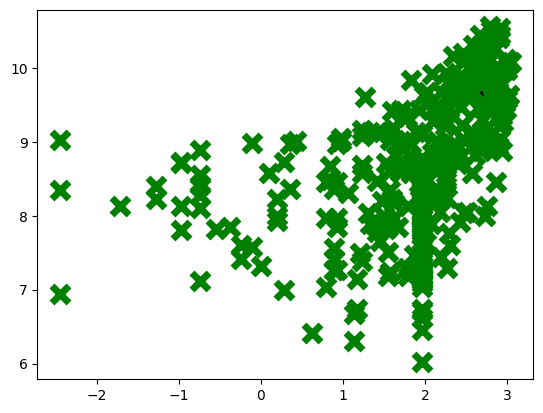

AttributeError: 'NoneType' object has no attribute 'colors'

In [151]:
colors = 10*["g","r","c","b","k"]

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
            distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            return classification

clf = K_Means()
clf.fit(W)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
    marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
    plt.show().colors = 10*["g","r","c","b","k"]

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
            distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            return classification

clf = K_Means()
clf.fit(W)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
    marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
    plt.show()

# DBScan

In [ ]:
#DBScan Clustering
from sklearn.cluster import DBSCAN